In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/job-opportunity-dataset/job.csv


In [34]:
#Leitura do Arquivo.(Reading File.)
job_dataset = pd.read_csv('/kaggle/input/job-opportunity-dataset/job.csv')
job_dataset.head()

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago


In [35]:
#Verificando o tipo das colunas. (Checking the types of columms.)
job_dataset.dtypes

job_title       object
company_name    object
location        object
start_date      object
ctc             object
experience      object
posted          object
dtype: object

'''Fase de Processamento e Limpeza. (Processing and cleaning Phase.)'''

In [36]:
#Formantando a coluna para conversão (Formatting the column for conversion.)
#Removendo virgulas, ₹ e -. (Removing commas,  ₹ and -.)
job_dataset["ctc"] = job_dataset["ctc"].str.replace('₹', '')
job_dataset["ctc"] = job_dataset["ctc"].str.replace(',', '')
job_dataset["ctc"] = job_dataset["ctc"].str.replace('-', '')

#Retirando os espaços da coluna ctc. (Removing ctc column spaces.)
job_dataset["ctc"] = job_dataset["ctc"].str.lstrip()
job_dataset["ctc"] = job_dataset["ctc"].str.rstrip()

#Separando as colunas em valores minimos e máximos. (Separating the columns in min and max values.)
job_dataset["ctc_min"] = job_dataset["ctc"].str[0:6]
job_dataset["ctc_max"] = job_dataset["ctc"].str[7:14]

#Convertendo valores não numéricos em valores ausentes. (Converting non-numeric values in NaN values.)
job_dataset["ctc_min"] = pd.to_numeric(job_dataset["ctc_min"], errors = "coerce")
job_dataset["ctc_max"] = pd.to_numeric(job_dataset["ctc_max"], errors = "coerce")

#Substituindo valores Nan com 0. (Replacing Nan values with 0.)
job_dataset["ctc_min"].fillna(0, inplace = True)
job_dataset["ctc_max"].fillna(0, inplace = True)

#Convertendo valores para dado do tipo int. (Conventing values for int data)
job_dataset["ctc_min"] = job_dataset["ctc_min"].astype(int)
job_dataset["ctc_max"] = job_dataset["ctc_max"].astype(int)

#Criando a coluna ctc_mean. (Creating the ctc_mean column )
job_dataset["ctc_mean"] = (job_dataset["ctc_min"] + job_dataset["ctc_max"]) / 2
job_dataset["ctc_mean"] = job_dataset["ctc_mean"].astype(int)

job_dataset.head()

,job_title,company_name,location,start_date,ctc,experience,posted,ctc_min,ctc_max,ctc_mean
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,200000 300000,0-1 years,3 days ago,200000,300000,250000
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,300000 350000,0-2 years,1 week ago,300000,350000,325000
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,300000 350000,0-2 years,3 days ago\n\n\nBe an early applicant,300000,350000,325000
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,200000 400000,0-5 years,3 weeks ago,200000,400000,300000
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,240000 360000,0-2 years,2 weeks ago,240000,360000,300000


In [37]:
#Verificando se as colunas ctc_min, ctc_max e ctc_mean são do tipo int. (Checking if the ctc_min, ctc_max and ctc_mean are int data.)
job_dataset.dtypes

job_title       object
company_name    object
location        object
start_date      object
ctc             object
experience      object
posted          object
ctc_min          int64
ctc_max          int64
ctc_mean         int64
dtype: object

In [38]:
#Removendo coluna ctc. (Removing ctc column.)
job_dataset = job_dataset.drop("ctc", axis =1)

job_dataset.head()

,job_title,company_name,location,start_date,experience,posted,ctc_min,ctc_max,ctc_mean
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,0-1 years,3 days ago,200000,300000,250000
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,0-2 years,1 week ago,300000,350000,325000
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,0-2 years,3 days ago\n\n\nBe an early applicant,300000,350000,325000
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,0-5 years,3 weeks ago,200000,400000,300000
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,0-2 years,2 weeks ago,240000,360000,300000


In [39]:
#Convertendo Rúpia em Real. (Converting Rúpia in Real.)
job_dataset["ctc_min(R$)"] = round(job_dataset["ctc_min"] / 17)
job_dataset["ctc_max(R$)"] = round(job_dataset["ctc_max"] / 17)
job_dataset["ctc_mean(R$)"] = round(job_dataset["ctc_mean"] / 17)

#Removendo todas as colunas ctc. (Removing all ctc columns.)
job_dataset = job_dataset.drop("ctc_min", axis = 1)
job_dataset = job_dataset.drop("ctc_max", axis = 1)
job_dataset = job_dataset.drop("ctc_mean", axis = 1)

job_dataset.head()

,job_title,company_name,location,start_date,experience,posted,ctc_min(R$),ctc_max(R$),ctc_mean(R$)
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,0-1 years,3 days ago,11765.0,17647.0,14706.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,0-2 years,1 week ago,17647.0,20588.0,19118.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,0-2 years,3 days ago\n\n\nBe an early applicant,17647.0,20588.0,19118.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,0-5 years,3 weeks ago,11765.0,23529.0,17647.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,0-2 years,2 weeks ago,14118.0,21176.0,17647.0


In [40]:
#Removendo "years" da coluna experience. (Removing "years" from experience column.)
job_dataset["experience"] = job_dataset["experience"].str.replace("years", "")
job_dataset["experience"] = job_dataset["experience"].str.replace("year", "")

#Separando as strings por "-". (Separating the strings by "-")
job_dataset["experience"] = job_dataset["experience"].str.split("-")

#Criando as colunas "experience_min" e "experience_required". (Creating the experience_min and experience_required column.)
job_dataset["experience_min(years)"] = job_dataset["experience"].str[0]
job_dataset["experience_required(years)"] = job_dataset["experience"].str[1]

#Substituindo valores ausentes por 0. (Replacing NaN values with 0)
job_dataset["experience_required(years)"].fillna(0, inplace = True)

#Formatando os dados. (Formating datas.)
job_dataset["experience_min(years)"] = job_dataset["experience_min(years)"].astype(int)
job_dataset["experience_required(years)"] = job_dataset["experience_required(years)"].astype(int)

#Criando coluna experience_mean. (Creating experience_mean column.)
job_dataset["experience_mean(years)"] = (job_dataset["experience_min(years)"] + job_dataset["experience_required(years)"]) / 2

#Removendo a coluna experience. (Removing the experience column.)
job_dataset = job_dataset.drop("experience", axis = 1)

job_dataset.head()

,job_title,company_name,location,start_date,posted,ctc_min(R$),ctc_max(R$),ctc_mean(R$),experience_min(years),experience_required(years),experience_mean(years)
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,3 days ago,11765.0,17647.0,14706.0,0,1,0.5
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,1 week ago,17647.0,20588.0,19118.0,0,2,1.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,3 days ago\n\n\nBe an early applicant,17647.0,20588.0,19118.0,0,2,1.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,3 weeks ago,11765.0,23529.0,17647.0,0,5,2.5
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,2 weeks ago,14118.0,21176.0,17647.0,0,2,1.0


In [41]:
#Encontrar as strings "weeks" e "days". (Find the "weeks" and "days" strings.)
day = re.compile("day")
week = re.compile("week")#Somente precisa encontrar a string week. (Only need to find the week string)

#loop percorrenod a coluna posted. (Loop traversing the posted column.)
for indice, valor in enumerate(job_dataset["posted"]):
    
    #Se for encontrado a string days. (If finded the days string.) 
    if day.search(valor):
        
        #Retornar apenas números. (Return only numeric.)
        only_numeric = re.findall(r"\d+", valor)
        
        #Converta os valores númericos para int, e valores não númericos para NaN. (Convert the numeric values for int, and non-numeric values for NaN.)
        job_dataset.at[indice, "posted"] = pd.to_numeric(only_numeric, errors = "coerce").astype(int)
    
    #Se for encontrado a string week. (If finded the week string.) 
    if week.search(valor):
        
        #Retornar apenas números. (Return only numeric.)
        only_numeric = re.findall(r"\d+", valor)
        
        #Converta os valores númericos para int, e valores não númericos para NaN. (Convert the numeric values for int, and non-numeric values for NaN.)
        job_dataset.at[indice, "posted"] = pd.to_numeric(only_numeric, errors = "coerce").astype(int) * 7

    else:
        
        job_dataset.at[indice, "posted"] = pd.to_numeric(only_numeric, errors = "coerce").astype(int) 

# Substituindo valores Nan com 0. (Replacing Nan values with 0.)
job_dataset["posted"].fillna(0, inplace=True)        
        
#Renomeando a coluna. (Rename the column.)
job_dataset["posted(days)"] = job_dataset["posted"]

#Removendo a coluna posted. (Removing the posted column.)
job_dataset = job_dataset.drop("posted", axis = 1)

job_dataset.head()
        

,job_title,company_name,location,start_date,ctc_min(R$),ctc_max(R$),ctc_mean(R$),experience_min(years),experience_required(years),experience_mean(years),posted(days)
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,11765.0,17647.0,14706.0,0,1,0.5,3
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,17647.0,20588.0,19118.0,0,2,1.0,7
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,17647.0,20588.0,19118.0,0,2,1.0,3
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,11765.0,23529.0,17647.0,0,5,2.5,21
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,14118.0,21176.0,17647.0,0,2,1.0,14


In [42]:
'''Não usaremos a coluna "start_date" em nossa análises. 
(We won't use the start_date column in our analysis.)'''
job_dataset = job_dataset.drop("start_date", axis = 1)

In [43]:
#Remove todos os arrays vazios. (Remove all Nan arrays.)
job_dataset = job_dataset[~job_dataset["posted(days)"].apply(lambda x: isinstance(x, np.ndarray) and x.size == 0)]

In [44]:
#Formatando os dados. (Formating the data.)
job_dataset["posted(days)"] = job_dataset["posted(days)"].astype(int)
job_dataset["job_title"] = job_dataset["job_title"].astype(str)
job_dataset["company_name"] = job_dataset["company_name"].astype(str)
job_dataset["location"] = job_dataset["location"].astype(str)

job_dataset.dtypes

job_title                      object
company_name                   object
location                       object
ctc_min(R$)                   float64
ctc_max(R$)                   float64
ctc_mean(R$)                  float64
experience_min(years)           int64
experience_required(years)      int64
experience_mean(years)        float64
posted(days)                    int64
dtype: object

In [45]:
job_dataset.head()

,job_title,company_name,location,ctc_min(R$),ctc_max(R$),ctc_mean(R$),experience_min(years),experience_required(years),experience_mean(years),posted(days)
0,Business Development Associate,Break The Code,Mumbai,11765.0,17647.0,14706.0,0,1,0.5,3
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,17647.0,20588.0,19118.0,0,2,1.0,7
2,Fashion Designer,Valkyre Clothing,Mumbai,17647.0,20588.0,19118.0,0,2,1.0,3
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,11765.0,23529.0,17647.0,0,5,2.5,21
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,14118.0,21176.0,17647.0,0,2,1.0,14


In [46]:
job_dataset.to_csv("job_dataset.csv", index = True)

Fase de Análise. (Analysis Phase.)

• **Quais os trabalhos mais requisitados?** (What are the most in-demand jobs?) 
• **Quais são os trabalhos mais requisitados por região?** (What are the most in-demand jobs by region?)
• **Qual a média de experiência requisitada por trabalho?** (What's the average experience in-demand by job?) 
• **Qual a média de experiência requisitada por região?** (What's the average experience in-demand by region?) 
• **Qual a média salarial por trabalho?** (What's average salary by job?)
• **Qual a média salarial por região?** (What's average salary by region?)
• **Quais empresas pedem mais experiência?** (What are company need the more experience?)
• **Quais empresas com as melhores remunerações?** (What are company with the more salary?)
• **Qual a relação experiência/salário?** (What's the relation experience/salary?)

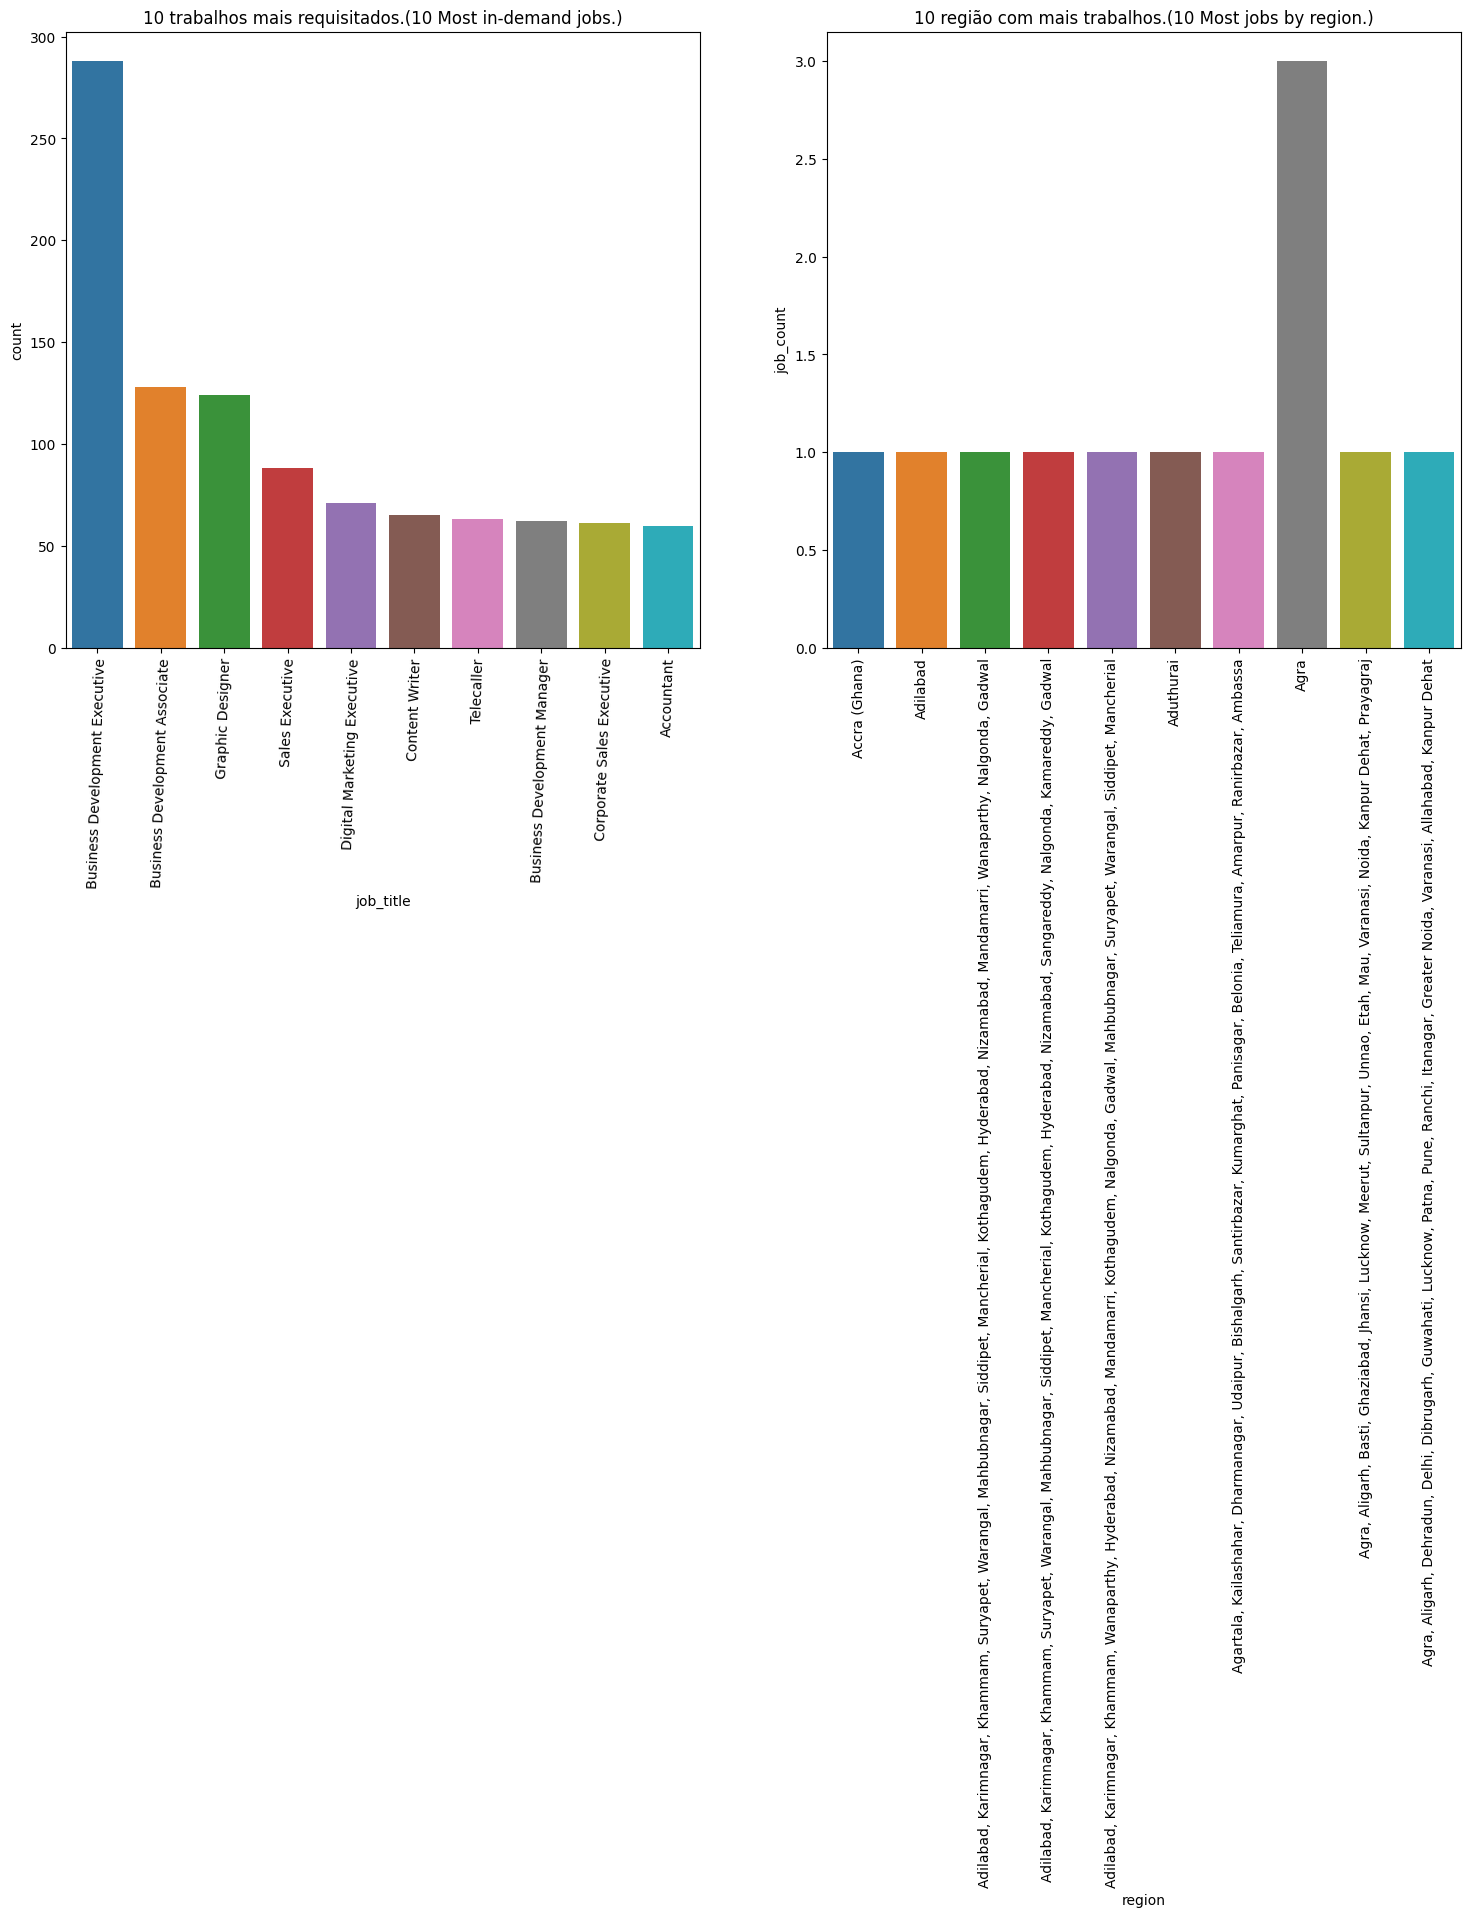

In [47]:
'''Quais os trabalhos mais requisitados? Quais são os trabalhos mais requisitados por região? 
   (What are the most in-demand jobs? What are the most in-demand jobs by region? )''' 

#Fazendo a contagem de vagas de empregos. (Counting job_title.) 
job_dataset_jobs_counts = job_dataset["job_title"].value_counts() 
#Por região. (By region.) 
job_dataset_job_region = job_dataset.groupby("location")["job_title"].count() 

#Os 10 trabalhos mais requisitados. (The most 10 in-demand jobs.) 
job_dataset_jobs_counts_10 = job_dataset_jobs_counts.head(10) 
#Por região. (By region.) 
job_dataset_job_region_10 = job_dataset_job_region.head(10) 

#Definindo eixo x e y. (Defining the x and y axes) 
jobs_counts = pd.DataFrame({"job_title" : job_dataset_jobs_counts_10.index, 
                            "count" : job_dataset_jobs_counts_10.values}) 

#Por região. (By region.) 
jobs_region = pd.DataFrame({"job_count" : job_dataset_job_region_10.values, 
                            "region" : job_dataset_job_region_10.index})

#Subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8)) 

#Gráfico de contagem de trabalho. (Count jobs graph.) 
sns.barplot(data = jobs_counts, 
            x = "job_title", 
            y = "count", ax = ax1) 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=88) 
ax1.set_title("10 trabalhos mais requisitados.(10 Most in-demand jobs.)") 

#Gráfico de trabalho por região. (Job by region graph.) 
sns.barplot(data = jobs_region, 
            x = "region", 
            y = "job_count", ax = ax2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("10 região com mais trabalhos.(10 Most jobs by region.)") 

plt.show()

In [48]:
jobs_region.head()

,job_count,region
0,1,Accra (Ghana)
1,1,Adilabad
2,1,"Adilabad, Karimnagar, Khammam, Suryapet, Waran..."
3,1,"Adilabad, Karimnagar, Khammam, Suryapet, Waran..."
4,1,"Adilabad, Karimnagar, Khammam, Wanaparthy, Hyd..."


Text(0.5, 1.0, 'Experiência média por trabalho')

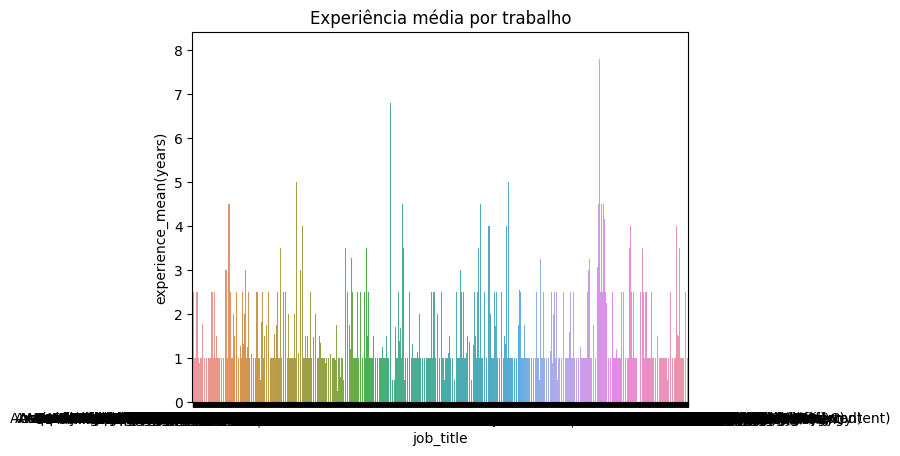

In [49]:
'''#Qual média de experiência requisitada por trabalho e região?. 
(What's average experience in-demand by job and region?)'''

#Média de experiência por trabalho. (Average experience by job)
job_dataset_job_experience = job_dataset.groupby("job_title")["experience_mean(years)"].mean().map("{:.2f}".format).reset_index()
#By region.
job_dataset_job_experience_region = job_dataset.groupby("location")["experience_mean(years)"].mean().map("{:.2f}".format).reset_index()

job_dataset_job_experience["experience_mean(years)"] = job_dataset_job_experience["experience_mean(years)"].astype(float)
job_dataset_job_experience_region["experience_mean(years)"] = job_dataset_job_experience_region["experience_mean(years)"].astype(float)

sns.barplot(data = job_dataset_job_experience, 
            x = "job_title",
            y = "experience_mean(years)").set_title("Experiência média por trabalho")

In [50]:
'''#Definindo eixo x e y. (Defining the x and y axes) 
jobs_experience = pd.DataFrame({"job_title" : job_dataset_job_experience.index, 
                            "experience" : job_dataset_job_experience.values}) 

#Por região. (By region.) 
region_experience = pd.DataFrame({"experience" : job_dataset_job_experience_region.values, 
                            "region" : job_dataset_job_expeience_region.index}) 

sns.barplot(data = job_dataset_job_experience, 
            x = "job_title",
            y = "experience_mean(years)").set_title("Experiência média por trabalho")'''

'#Definindo eixo x e y. (Defining the x and y axes) \njobs_experience = pd.DataFrame({"job_title" : job_dataset_job_experience.index, \n                            "experience" : job_dataset_job_experience.values}) \n\n#Por região. (By region.) \nregion_experience = pd.DataFrame({"experience" : job_dataset_job_experience_region.values, \n                            "region" : job_dataset_job_expeience_region.index}) \n\nsns.barplot(data = job_dataset_job_experience, \n            x = "job_title",\n            y = "experience_mean(years)").set_title("Experiência média por trabalho")'